<a href="https://colab.research.google.com/github/daniela150803/LINEAR-REGRESSION/blob/main/modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/deepfake-face-images
Found 12890 files belonging to 2 classes.
Using 10312 files for training.
Found 12890 files belonging to 2 classes.
Using 2578 files for validation.
Clases: ['Fake', 'Real']
Precisión mixta activada
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 125s 284ms/step - CategoricalAccuracy: 0.5634 - loss: 0.8098 - val_CategoricalAccuracy: 0.5365 - val_loss: 0.7930
Epoch 2/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - CategoricalAccuracy: 0.6796 - loss: 0.6192 - val_CategoricalAccuracy: 0.6249 - val_loss: 0.6624
Epoch 3/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - CategoricalAccuracy: 0.7038 - loss: 0.5594 - val_CategoricalAccuracy: 0.7292 - val_loss: 0.5849
Epoch 4/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - CategoricalAccuracy: 0.7372 - loss: 0.5160 - val_CategoricalAccuracy: 0.6676 - val_loss: 0.6158
Epoch 5/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - CategoricalAccuracy: 0.757

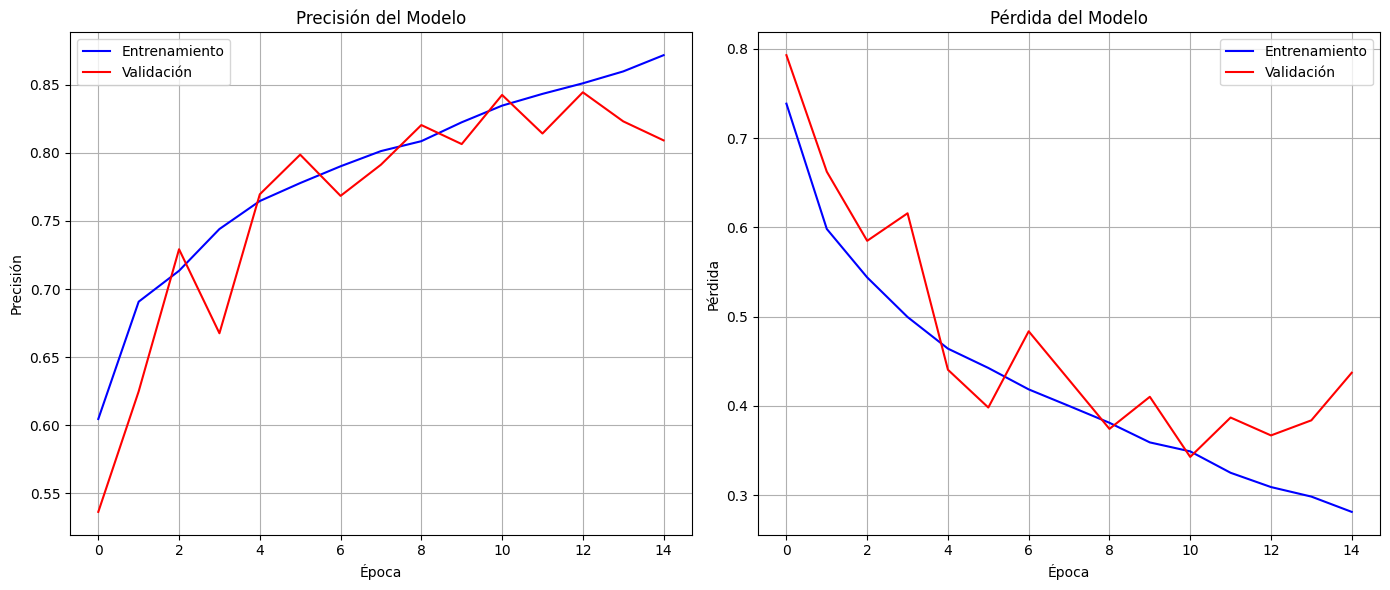

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 9s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


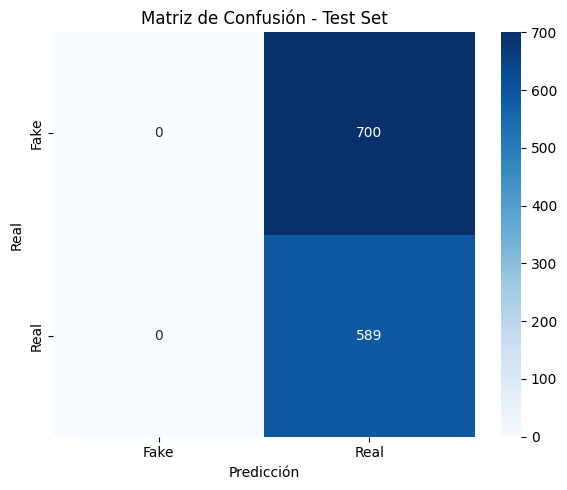

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, MaxPooling2D, Concatenate
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# =============================================================================
# Dataset con train, val y test separado
# =============================================================================
import kagglehub
path = kagglehub.dataset_download("kshitizbhargava/deepfake-face-images")
print("Path to dataset files:", path)

data_dir = os.path.join(path, "Final Dataset")
img_height = 224
img_width = 224
AUTOTUNE = tf.data.AUTOTUNE
batch_s2, lr2, num_epochs2 = 38, 0.001, 15
optimizerf2 = tf.keras.optimizers.Adam(learning_rate=lr2)

# === Train y Validation (80/20) usando validation_split ===
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    label_mode="categorical",
    batch_size=batch_s2
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    label_mode="categorical",
    batch_size=batch_s2
)

class_names = train_ds.class_names
print("Clases:", class_names)

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# === Test Dataset separado aleatoriamente (10%) ===
all_images_dir = pathlib.Path(data_dir)
all_image_paths = list(all_images_dir.glob('*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

all_labels = [pathlib.Path(p).parent.name for p in all_image_paths]
label_to_index = {label: idx for idx, label in enumerate(sorted(set(all_labels)))}
all_labels_encoded = [label_to_index[label] for label in all_labels]

# Tomamos 10% como test
_, X_test, _, y_test = train_test_split(
    all_image_paths, all_labels_encoded, test_size=0.1, random_state=42, stratify=all_labels_encoded
)

def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    return img / 255.0

def path_label_dataset(file_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(file_paths)
    label_ds = tf.data.Dataset.from_tensor_slices(tf.keras.utils.to_categorical(labels, num_classes=2))
    img_ds = path_ds.map(lambda x: load_and_preprocess_image(x), num_parallel_calls=AUTOTUNE)
    return tf.data.Dataset.zip((img_ds, label_ds))

test_ds = path_label_dataset(X_test, y_test).batch(batch_s2).cache().prefetch(AUTOTUNE)

# =============================================================================
# Modelo
# =============================================================================

class FrequencyAnalyzer(layers.Layer):
    def __init__(self, **kwargs):
        super(FrequencyAnalyzer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.conv = Conv2D(64, (3, 3), activation='relu', padding='same')
        self.bn = BatchNormalization()
        super(FrequencyAnalyzer, self).build(input_shape)

    def call(self, inputs):
        weights = tf.constant([0.299, 0.587, 0.114], dtype=inputs.dtype)
        gray = tf.reduce_sum(inputs * weights, axis=-1, keepdims=False)
        fft = tf.signal.fft2d(tf.cast(gray, tf.complex64))
        fft_shifted = tf.signal.fftshift(fft)
        magnitude = tf.math.log(tf.abs(fft_shifted) + 1e-6)
        magnitude = tf.expand_dims(magnitude, axis=-1)
        x = self.conv(magnitude)
        x = self.bn(x)
        return x

class AttentionModule(layers.Layer):
    def __init__(self, channels, ratio=8, **kwargs):
        super(AttentionModule, self).__init__(**kwargs)
        self.channels = channels
        self.global_pool = GlobalAveragePooling2D()
        self.dense1 = Dense(channels // ratio, activation='relu')
        self.dense2 = Dense(channels, activation='sigmoid')

    def call(self, inputs):
        x = self.global_pool(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        x = tf.reshape(x, [-1, 1, 1, self.channels])
        return inputs * x

def OptimizedDeepfakeDetector(input_shape=(224, 224, 3), use_mixed_precision=True):
    if use_mixed_precision and tf.config.list_physical_devices('GPU'):
        policy = tf.keras.mixed_precision.Policy('mixed_float16')
        tf.keras.mixed_precision.set_global_policy(policy)
        print("Precisión mixta activada")

    inputs = layers.Input(shape=input_shape)
    x = layers.Rescaling(1./255)(inputs)

    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_tensor=x,
        pooling=None
    )

    for layer in base_model.layers[:110]:
        layer.trainable = False

    activations = []
    target_layers = ['block2a_expand_activation', 'block3a_expand_activation', 'block5c_add']
    for layer in target_layers:
        activation = base_model.get_layer(layer).output
        activations.append(activation)

    x_freq = FrequencyAnalyzer()(inputs)
    x_freq = MaxPooling2D((2,2))(x_freq)

    processed_features = []
    for i, activation in enumerate(activations):
        x_act = Conv2D(64, (1,1), padding='same')(activation)
        x_act = BatchNormalization()(x_act)
        if i == len(activations) - 1:
            channels = tf.keras.backend.int_shape(x_act)[-1]
            x_act = AttentionModule(channels)(x_act)
        x_act = GlobalAveragePooling2D()(x_act)
        processed_features.append(x_act)

    x_freq = GlobalAveragePooling2D()(x_freq)
    x_freq = Dense(64, activation='relu')(x_freq)
    processed_features.append(x_freq)

    x = Concatenate()(processed_features)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.4)(x)
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# =============================================================================
# Entrenamiento
# =============================================================================

modelo = OptimizedDeepfakeDetector()
modelo.compile(
    optimizer=optimizerf2,
    loss='categorical_crossentropy',
    metrics=['CategoricalAccuracy']
)

history = modelo.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs2,
    verbose=1
)

# =============================================================================
# Gráficas de entrenamiento
# =============================================================================

plt.figure(figsize=(14, 6))
acc_key = [k for k in history.history if 'accuracy' in k.lower() and 'val' not in k][0]
val_acc_key = [k for k in history.history if 'accuracy' in k.lower() and 'val' in k][0]

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], 'b', label='Entrenamiento')
plt.plot(history.history[val_acc_key], 'r', label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b', label='Entrenamiento')
plt.plot(history.history['val_loss'], 'r', label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# =============================================================================
# Evaluación en test set
# =============================================================================

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = modelo.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("\nClasificación en test:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Test Set")
plt.tight_layout()
plt.show()
